# Data Analysis with Python on Cars Dataset

Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Import data

In [2]:
data = pd.read_csv('cars_data.csv')
data.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


#### Data Inspection

In [3]:
data.shape

(432, 15)

In [4]:
data.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

converting data columns to lower case

In [5]:
data.columns = data.columns.str.lower()
data.columns

Index(['make', 'model', 'type', 'origin', 'drivetrain', 'msrp', 'invoice',
       'enginesize', 'cylinders', 'horsepower', 'mpg_city', 'mpg_highway',
       'weight', 'wheelbase', 'length'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   make         428 non-null    object 
 1   model        428 non-null    object 
 2   type         428 non-null    object 
 3   origin       428 non-null    object 
 4   drivetrain   428 non-null    object 
 5   msrp         428 non-null    object 
 6   invoice      428 non-null    object 
 7   enginesize   428 non-null    float64
 8   cylinders    426 non-null    float64
 9   horsepower   428 non-null    float64
 10  mpg_city     428 non-null    float64
 11  mpg_highway  428 non-null    float64
 12  weight       428 non-null    float64
 13  wheelbase    428 non-null    float64
 14  length       428 non-null    float64
dtypes: float64(8), object(7)
memory usage: 50.8+ KB


Inspecting numerical data

In [7]:
data.describe(include=[np.number])

,enginesize,cylinders,horsepower,mpg_city,mpg_highway,weight,wheelbase,length
count,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


Inspecting categorical data

In [8]:
data.describe(include=['O'])

,make,model,type,origin,drivetrain,msrp,invoice
count,428,428,428,428,428,428,428
unique,38,425,6,3,3,410,425
top,Toyota,C240 4dr,Sedan,Asia,Front,"$25,700","$68,306"
freq,28,2,262,158,226,2,2


#### Inspecting missing data

In [9]:
import sidetable

data.stb.missing()

,missing,total,percent
cylinders,6,432,1.388889
make,4,432,0.925926
model,4,432,0.925926
type,4,432,0.925926
origin,4,432,0.925926
drivetrain,4,432,0.925926
msrp,4,432,0.925926
invoice,4,432,0.925926
enginesize,4,432,0.925926
horsepower,4,432,0.925926


view of null data

In [10]:
data[data.isnull().any(axis=1)]

,make,model,type,origin,drivetrain,msrp,invoice,enginesize,cylinders,horsepower,mpg_city,mpg_highway,weight,wheelbase,length
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,Mazda,RX-8 4dr automatic,Sports,Asia,Rear,"$25,700","$23,794",1.3,NaN,197.0,18.0,25.0,3053.0,106.0,174.0
252,Mazda,RX-8 4dr manual,Sports,Asia,Rear,"$27,200","$25,179",1.3,NaN,238.0,18.0,24.0,3029.0,106.0,174.0


Dropping all null rows since entire rows were null

In [11]:
data = data.dropna(axis=0)
data.stb.missing()

,missing,total,percent
make,0,426,0.0
model,0,426,0.0
type,0,426,0.0
origin,0,426,0.0
drivetrain,0,426,0.0
msrp,0,426,0.0
invoice,0,426,0.0
enginesize,0,426,0.0
cylinders,0,426,0.0
horsepower,0,426,0.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   make         426 non-null    object 
 1   model        426 non-null    object 
 2   type         426 non-null    object 
 3   origin       426 non-null    object 
 4   drivetrain   426 non-null    object 
 5   msrp         426 non-null    object 
 6   invoice      426 non-null    object 
 7   enginesize   426 non-null    float64
 8   cylinders    426 non-null    float64
 9   horsepower   426 non-null    float64
 10  mpg_city     426 non-null    float64
 11  mpg_highway  426 non-null    float64
 12  weight       426 non-null    float64
 13  wheelbase    426 non-null    float64
 14  length       426 non-null    float64
dtypes: float64(8), object(7)
memory usage: 53.2+ KB


converting msrp, invoice to numerical

In [13]:
data[['msrp', 'invoice']].head()

,msrp,invoice
0,"$36,945","$33,337"
1,"$23,820","$21,761"
2,"$26,990","$24,647"
3,"$33,195","$30,299"
4,"$43,755","$39,014"


> remove $ at start of string

In [14]:
data['msrp'].str[1:].head()

0    36,945 
1    23,820 
2    26,990 
3    33,195 
4    43,755 
Name: msrp, dtype: object

In [15]:
data['invoice'].str[1:].head()

0    33,337 
1    21,761 
2    24,647 
3    30,299 
4    39,014 
Name: invoice, dtype: object

In [16]:
data.msrp = data.msrp.str[1:]
data.msrp.head()

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0    36,945 
1    23,820 
2    26,990 
3    33,195 
4    43,755 
Name: msrp, dtype: object

In [17]:
data.invoice = data.invoice.str[1:]
data.invoice.head()

0    33,337 
1    21,761 
2    24,647 
3    30,299 
4    39,014 
Name: invoice, dtype: object

> remove , from msrp

In [18]:
data.msrp = data.msrp.str.translate({ord(','): None})
data.msrp.head()

0    36945 
1    23820 
2    26990 
3    33195 
4    43755 
Name: msrp, dtype: object

In [19]:
data.invoice = data.invoice.str.translate({ord(','): None})
data.invoice.head()

0    33337 
1    21761 
2    24647 
3    30299 
4    39014 
Name: invoice, dtype: object

In [20]:
data['msrp'].describe()

count        426
unique       409
top       28495 
freq           2
Name: msrp, dtype: object

In [21]:
data.invoice.describe()

count        426
unique       423
top       68306 
freq           2
Name: invoice, dtype: object

In [22]:
data.msrp = data.msrp.astype('float')
data.msrp.head()

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0    36945.0
1    23820.0
2    26990.0
3    33195.0
4    43755.0
Name: msrp, dtype: float64

In [23]:
data.invoice = data.invoice.astype('float')
data.invoice.head()

0    33337.0
1    21761.0
2    24647.0
3    30299.0
4    39014.0
Name: invoice, dtype: float64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   make         426 non-null    object 
 1   model        426 non-null    object 
 2   type         426 non-null    object 
 3   origin       426 non-null    object 
 4   drivetrain   426 non-null    object 
 5   msrp         426 non-null    float64
 6   invoice      426 non-null    float64
 7   enginesize   426 non-null    float64
 8   cylinders    426 non-null    float64
 9   horsepower   426 non-null    float64
 10  mpg_city     426 non-null    float64
 11  mpg_highway  426 non-null    float64
 12  weight       426 non-null    float64
 13  wheelbase    426 non-null    float64
 14  length       426 non-null    float64
dtypes: float64(10), object(5)
memory usage: 53.2+ KB


### Exploratory Data Analysis

Getting numerical and categorical columns

In [25]:
data_num = data.select_dtypes(include=[np.number])
data_cat = data.select_dtypes(exclude=[np.number])

In [26]:
data_num.head()

,msrp,invoice,enginesize,cylinders,horsepower,mpg_city,mpg_highway,weight,wheelbase,length
0,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [27]:
data_cat.head()

,make,model,type,origin,drivetrain
0,Acura,MDX,SUV,Asia,All
1,Acura,RSX Type S 2dr,Sedan,Asia,Front
2,Acura,TSX 4dr,Sedan,Asia,Front
3,Acura,TL 4dr,Sedan,Asia,Front
4,Acura,3.5 RL 4dr,Sedan,Asia,Front


Getting numerical and categorical column names

In [28]:
cat_cols = data.columns[data.dtypes == 'object']
num_cols = data.columns[~(data.dtypes == 'object')]

In [29]:
cat_cols

Index(['make', 'model', 'type', 'origin', 'drivetrain'], dtype='object')

In [30]:
num_cols

Index(['msrp', 'invoice', 'enginesize', 'cylinders', 'horsepower', 'mpg_city',
       'mpg_highway', 'weight', 'wheelbase', 'length'],
      dtype='object')

#### value counts of all categorical columns

In [31]:
for c in cat_cols:
    print(c)
    print('----------')
    print(data[c].value_counts())
    print()
    print('---------------------------')

make
----------
Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Honda            17
Nissan           17
Chrysler         15
Volkswagen       15
Mitsubishi       13
Dodge            13
Volvo            12
Hyundai          12
Jaguar           12
Pontiac          11
Lexus            11
Kia              11
Subaru           11
Lincoln           9
Mercury           9
Mazda             9
Buick             9
Cadillac          8
Saturn            8
GMC               8
Infiniti          8
Suzuki            8
Saab              7
Acura             7
Porsche           7
Land Rover        3
Oldsmobile        3
Jeep              3
Isuzu             2
MINI              2
Scion             2
Hummer            1
Name: make, dtype: int64

---------------------------
model
----------
C240 4dr                                   2
G35 4dr                                    2
C320 4dr                                   2
Spectra GS 4dr hat

Plotting of all Categorical Columns

In [32]:
cat_cols

Index(['make', 'model', 'type', 'origin', 'drivetrain'], dtype='object')

In [33]:
plt.style.use('seaborn')

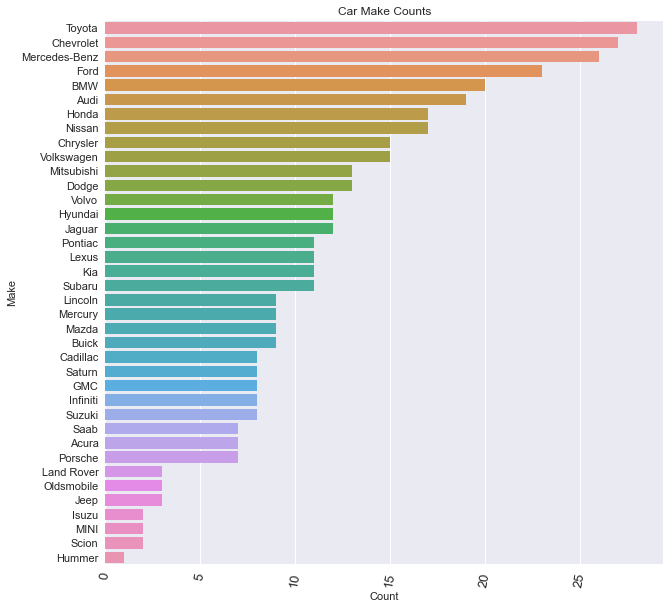

In [34]:
plt.figure(figsize=(10,10))
sns.barplot(y=data.make.value_counts().index, x=data.make.value_counts().values)
plt.xticks(rotation=80, fontsize=13)
plt.yticks(fontsize=11)
plt.title('Car Make Counts')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()

> Toyota, Chevrolet, Mercedes-Benz, Ford,  and BMW are the 5 most prominent car makes in the data

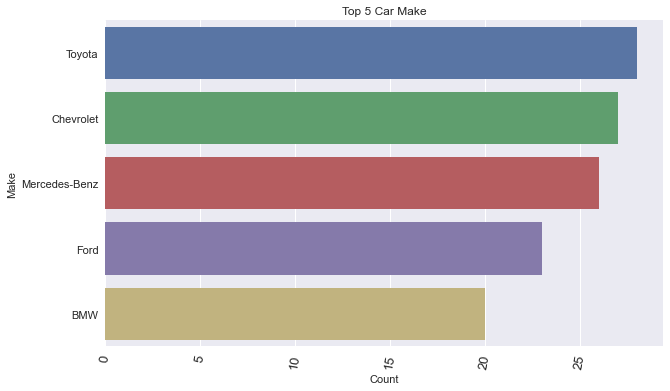

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(y=data.make.value_counts().head(5).index, x=data.make.value_counts().head(5).values)
plt.xticks(rotation=80, fontsize=13)
plt.yticks(fontsize=11)
plt.title('Top 5 Car Make')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()

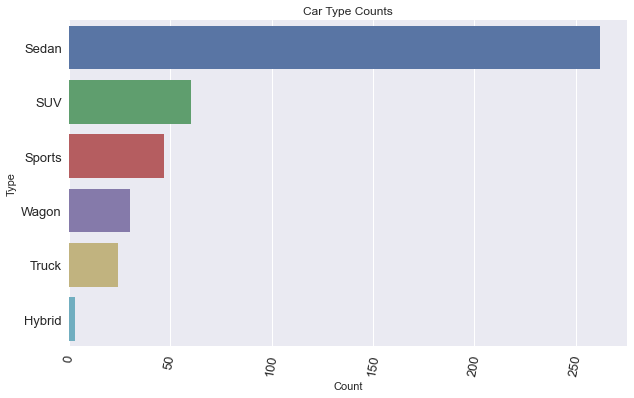

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(y=data.type.value_counts().index, x=data.type.value_counts().values)
plt.xticks(rotation=80, fontsize=13)
plt.yticks(fontsize=13)
plt.title('Car Type Counts')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

> Sedan is the highest Car type in the dataset

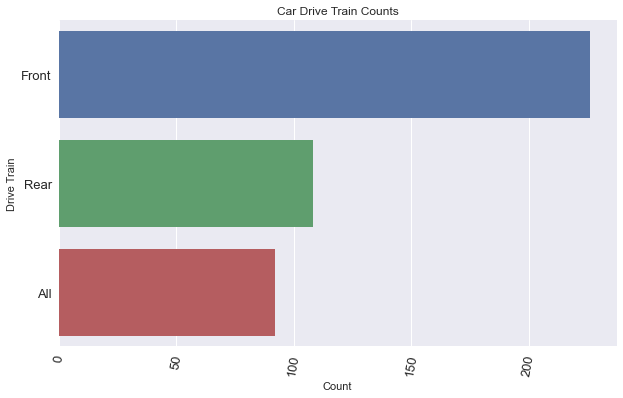

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(y=data.drivetrain.value_counts().index, x=data.drivetrain.value_counts().values)
plt.xticks(rotation=80, fontsize=13)
plt.yticks(fontsize=13)
plt.title('Car Drive Train Counts')
plt.xlabel('Count')
plt.ylabel('Drive Train')
plt.show()

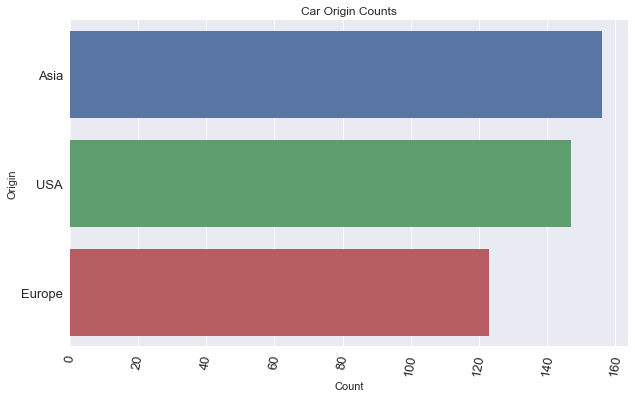

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(y=data.origin.value_counts().index, x=data.origin.value_counts().values)
plt.xticks(rotation=80, fontsize=13)
plt.yticks(fontsize=13)
plt.title('Car Origin Counts')
plt.xlabel('Count')
plt.ylabel('Origin')
plt.show()

Highest 10 Car make

In [39]:
make = data['make'].value_counts().head(10).to_frame()
make

,make
Toyota,28
Chevrolet,27
Mercedes-Benz,26
Ford,23
BMW,20
Audi,19
Honda,17
Nissan,17
Chrysler,15
Volkswagen,15


In [40]:
make = make.style.background_gradient(cmap='Reds')
make

,make
Toyota,28
Chevrolet,27
Mercedes-Benz,26
Ford,23
BMW,20
Audi,19
Honda,17
Nissan,17
Chrysler,15
Volkswagen,15


Highest 15 Car Make

In [41]:
data.make.value_counts().head(15).to_frame().style.background_gradient(cmap='Blues')

,make
Toyota,28
Chevrolet,27
Mercedes-Benz,26
Ford,23
BMW,20
Audi,19
Honda,17
Nissan,17
Chrysler,15
Volkswagen,15


In [42]:
data.head()

,make,model,type,origin,drivetrain,msrp,invoice,enginesize,cylinders,horsepower,mpg_city,mpg_highway,weight,wheelbase,length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


#### Which car make has highest MRP - sum()

In [43]:
data.groupby('make')['msrp'].sum().nlargest(10).to_frame().style.background_gradient(cmap='Greens')

,msrp
make,
Mercedes-Benz,1577077.000000
BMW,865705.000000
Audi,822850.000000
Jaguar,738965.000000
Chevrolet,717850.000000
Toyota,630685.000000
Porsche,584955.000000
Ford,552365.000000
Lexus,486370.000000


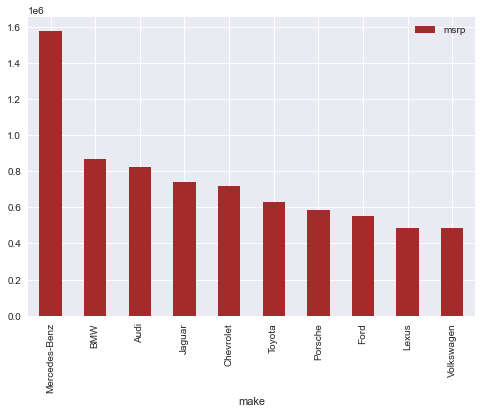

In [44]:
msrp_sum = data.groupby('make')['msrp'].sum().nlargest(10).to_frame()
msrp_sum.plot(kind='bar', color='brown')
plt.show()

In [45]:
data.groupby('make')['msrp'].mean().nlargest(10).to_frame().style.background_gradient(cmap='Greens')

,msrp
make,
Porsche,83565.000000
Jaguar,61580.416667
Mercedes-Benz,60656.807692
Cadillac,50474.375000
Hummer,49995.000000
Land Rover,45831.666667
Lexus,44215.454545
Audi,43307.894737
BMW,43285.250000


<AxesSubplot:xlabel='make'>

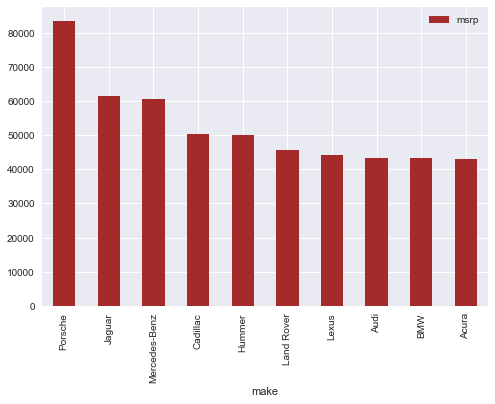

In [46]:
msrp_mean = data.groupby('make')['msrp'].mean().nlargest(10).to_frame()
msrp_mean.plot(kind='bar', color='brown')

> **Porsche had the highest MSRP (Manufacture's Suggested Retail Price) mean at 83,565**

**What features make Porsche the first ranking?**
> Get top 5 most expensive Porsche cars

In [47]:
Porshce = data[data['make'].str.contains('Porsche')]
porsh = Porshce.sort_values(by=['msrp'], ascending=False).nlargest(6, 'msrp')
porsh_make = porsh.style.background_gradient(cmap='Reds')
porsh_make

,make,model,type,origin,drivetrain,msrp,invoice,enginesize,cylinders,horsepower,mpg_city,mpg_highway,weight,wheelbase,length
338,Porsche,911 GT2 2dr,Sports,Europe,Rear,192465.000000,173560.000000,3.600000,6.000000,477.000000,17.000000,24.000000,3131.000000,93.000000,175.000000
336,Porsche,911 Carrera 4S coupe 2dr (convert),Sports,Europe,All,84165.000000,72206.000000,3.600000,6.000000,315.000000,17.000000,24.000000,3240.000000,93.000000,175.000000
335,Porsche,911 Carrera convertible 2dr (coupe),Sports,Europe,Rear,79165.000000,69229.000000,3.600000,6.000000,315.000000,18.000000,26.000000,3135.000000,93.000000,175.000000
337,Porsche,911 Targa coupe 2dr,Sports,Europe,Rear,76765.000000,67128.000000,3.600000,6.000000,315.000000,18.000000,26.000000,3119.000000,93.000000,175.000000
334,Porsche,Cayenne S,SUV,Europe,All,56665.000000,49865.000000,4.500000,8.000000,340.000000,14.000000,18.000000,4950.000000,112.000000,188.000000
340,Porsche,Boxster S convertible 2dr,Sports,Europe,Rear,52365.000000,45766.000000,3.200000,6.000000,258.000000,18.000000,26.000000,2911.000000,95.000000,170.000000


> **The 911 GT2 2dr Porsche model ranks the highest in MSRP. The GT2 2dr has the highest horse power of 477 and like the others is a sports type excet Cayenne S which is an SUV.**

What are the Vehicle types out there and which ones are considered to contribute more to the manufacturer's suggested retail price (MSRP)?

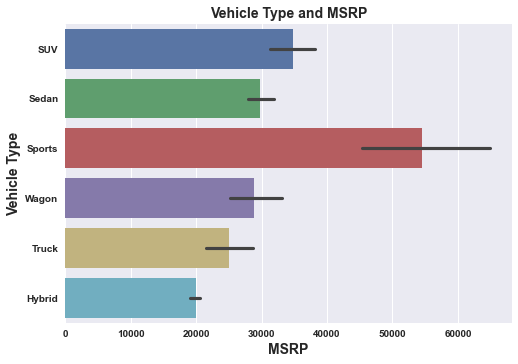

In [48]:
sns.barplot(x=data.msrp, y=data.type)
plt.title('Vehicle Type and MSRP', weight='bold', fontsize=14)
plt.ylabel('Vehicle Type', weight='bold', fontsize=14)
plt.xlabel('MSRP', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

> **Sports, Sedan and SUV types make the Make worth more in terms of Manufacturer's Suggested Retail Price**

> **Wagon, Truck and Hybrid Types make the Make worth less in tems of MSRP**

The Least Expensive makes

In [72]:
data.groupby('make')['msrp'].sum().nsmallest(10).to_frame().style.background_gradient(cmap='Greens')

,msrp
make,
Scion,27130.000000
MINI,36998.000000
Hummer,49995.000000
Isuzu,52298.000000
Oldsmobile,71290.000000
Jeep,73555.000000
Suzuki,129842.000000
Land Rover,137495.000000
Saturn,137875.000000


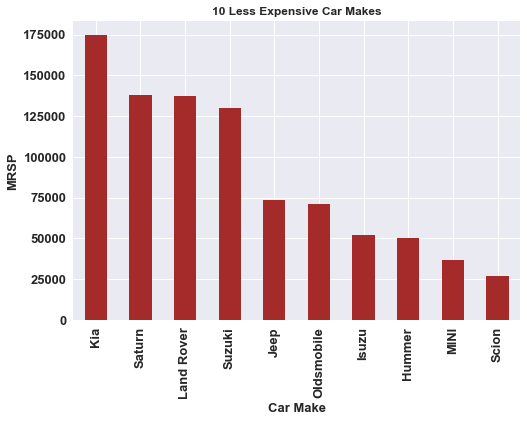

In [71]:
smallest = data.groupby('make').sum()[num_cols].nsmallest(10, 'msrp')
smallest.groupby(['make'])['msrp'].sum().nlargest(10).plot(kind='bar', color='brown')
plt.title('10 Less Expensive Car Makes', weight='bold')
plt.xticks(fontsize=13, weight='bold')
plt.yticks(fontsize=13, weight='bold')
plt.ylabel('MRSP', fontsize=13, weight='bold')
plt.xlabel('Car Make', fontsize=13, weight='bold')
plt.show()

##### Features that make Kia less expensive with MSRP

In [81]:
Kia = data[data['make'].str.contains('Kia')]
kia = Kia.sort_values(by=['msrp'], ascending=False).nsmallest(6, 'msrp')
kia_make = kia.style.background_gradient(cmap='Reds')
kia_make

,make,model,type,origin,drivetrain,msrp,invoice,enginesize,cylinders,horsepower,mpg_city,mpg_highway,weight,wheelbase,length
210,Kia,Rio 4dr manual,Sedan,Asia,Front,10280.000000,9875.000000,1.600000,4.000000,104.000000,26.000000,33.000000,2403.000000,95.000000,167.000000
211,Kia,Rio 4dr auto,Sedan,Asia,Front,11155.000000,10705.000000,1.600000,4.000000,104.000000,25.000000,32.000000,2458.000000,95.000000,167.000000
218,Kia,Rio Cinco,Wagon,Asia,Front,11905.000000,11410.000000,1.600000,4.000000,104.000000,26.000000,33.000000,2447.000000,95.000000,167.000000
212,Kia,Spectra 4dr,Sedan,Asia,Front,12360.000000,11630.000000,1.800000,4.000000,124.000000,24.000000,32.000000,2661.000000,101.000000,178.000000
213,Kia,Spectra GS 4dr hatch,Sedan,Asia,Front,13580.000000,12830.000000,1.800000,4.000000,124.000000,24.000000,32.000000,2686.000000,101.000000,178.000000
214,Kia,Spectra GSX 4dr hatch,Sedan,Asia,Front,14630.000000,13790.000000,1.800000,4.000000,124.000000,24.000000,32.000000,2697.000000,101.000000,178.000000


> **The Kia model Rio Rdr manual Sedan has the smallest MSRP. It has engine size of 1.6, horspower of 104 and 4 cylinders with a weight of 2403 and 95 wheelbase**

In [82]:
data.head()

,make,model,type,origin,drivetrain,msrp,invoice,enginesize,cylinders,horsepower,mpg_city,mpg_highway,weight,wheelbase,length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


### Correlation

In [84]:
corr = data[num_cols].corr()
corr.style.background_gradient(cmap='Oranges')

,msrp,invoice,enginesize,cylinders,horsepower,mpg_city,mpg_highway,weight,wheelbase,length
msrp,1.000000,0.999132,0.573238,0.649742,0.827296,-0.475916,-0.440523,0.447987,0.151665,0.171060
invoice,0.999132,1.000000,0.566019,0.645226,0.824079,-0.471304,-0.435452,0.441916,0.148003,0.165645
enginesize,0.573238,0.566019,1.000000,0.908002,0.793250,-0.717860,-0.725901,0.808707,0.638947,0.636015
cylinders,0.649742,0.645226,0.908002,1.000000,0.810341,-0.684402,-0.676100,0.742209,0.546730,0.547783
horsepower,0.827296,0.824079,0.793250,0.810341,1.000000,-0.677034,-0.647425,0.631758,0.387561,0.382386
mpg_city,-0.475916,-0.471304,-0.717860,-0.684402,-0.677034,1.000000,0.940993,-0.740418,-0.508029,-0.504184
mpg_highway,-0.440523,-0.435452,-0.725901,-0.676100,-0.647425,0.940993,1.000000,-0.793615,-0.525457,-0.468756
weight,0.447987,0.441916,0.808707,0.742209,0.631758,-0.740418,-0.793615,1.000000,0.760857,0.689168
wheelbase,0.151665,0.148003,0.638947,0.546730,0.387561,-0.508029,-0.525457,0.760857,1.000000,0.889838
length,0.171060,0.165645,0.636015,0.547783,0.382386,-0.504184,-0.468756,0.689168,0.889838,1.000000


### Distribution

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

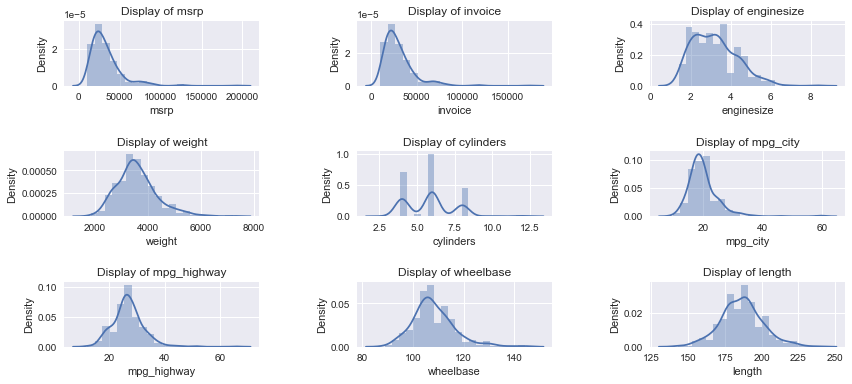

In [94]:
plt.figure(1, figsize=(14,6))
n=0
for x in ['msrp', 'invoice', 'enginesize', 'weight', 'cylinders', 'mpg_city', 'mpg_highway', 'wheelbase', 'length']:
    n += 1
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace=1, wspace=.5)
    sns.distplot(data[x], bins=20)
    plt.title('Display of {}'.format(x))
plt.show()

### Relationship between variables

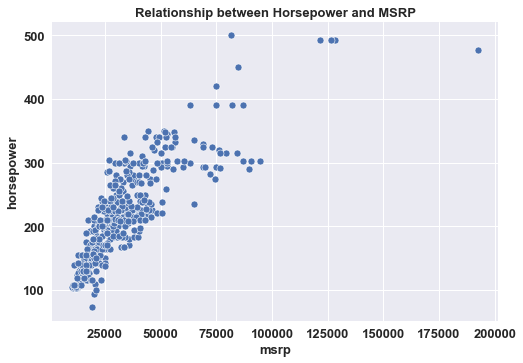

In [103]:
sns.scatterplot(data=data, x='msrp', y='horsepower')
plt.title('Relationship between Horsepower and MSRP', fontsize=13, weight='bold')
plt.xticks(fontsize=13, weight='bold')
plt.yticks(fontsize=13, weight='bold')
plt.xlabel('msrp',weight='bold', fontsize=13)
plt.ylabel('horsepower',weight='bold', fontsize=13)
plt.show()

##### How Origin is correlated to MSRP

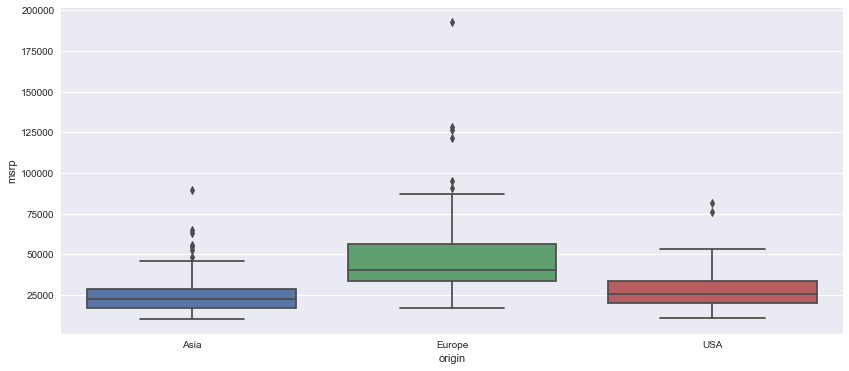

In [104]:
fig = plt.figure(figsize=(14, 6))
sns.boxplot(x='origin', y='msrp', data=data)
plt.show()

> **Cars from Europe contribute more to MSRP**

##### How type is correlated to MSRP

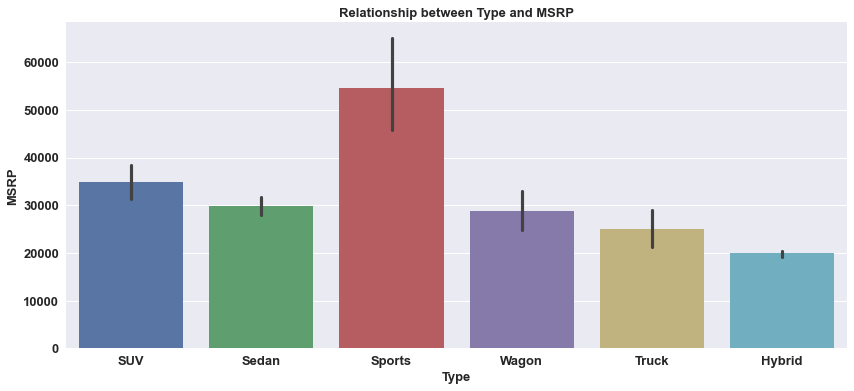

In [109]:
fig = plt.figure(figsize=(14, 6))
sns.barplot(x='type', y='msrp', data=data)
plt.title('Relationship between Type and MSRP', fontsize=13, weight='bold')
plt.xticks(fontsize=13, weight='bold')
plt.yticks(fontsize=13, weight='bold')
plt.xlabel('Type',weight='bold', fontsize=13)
plt.ylabel('MSRP',weight='bold', fontsize=13)
plt.show()

> **Sports type contribute more to MSRP, then SUV and Sedan**

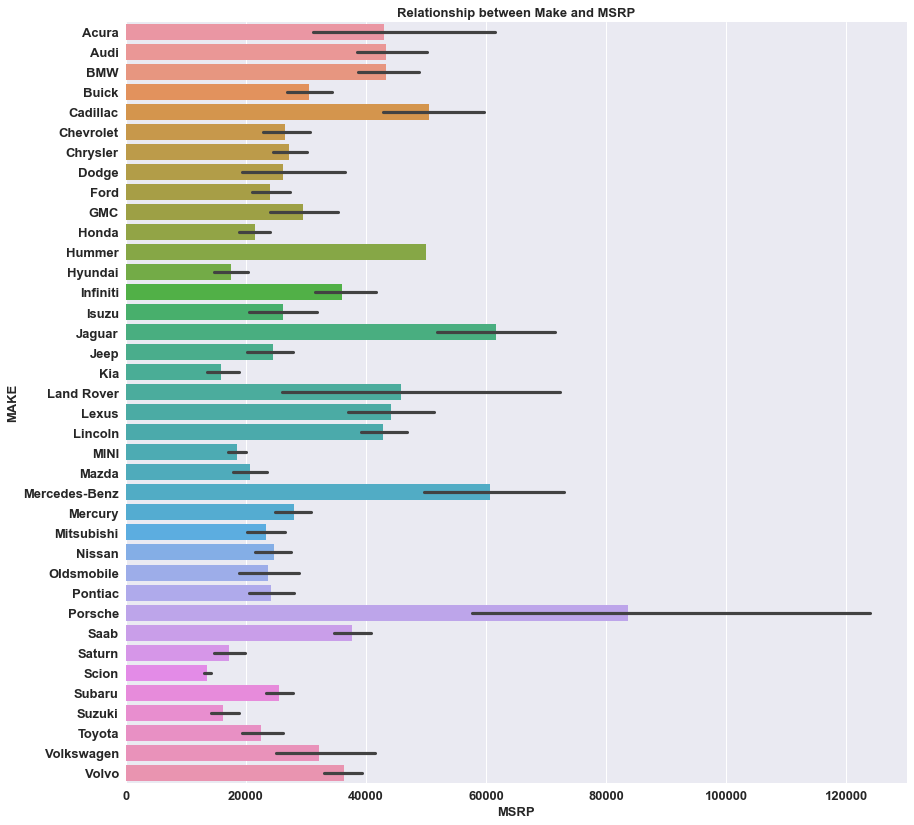

In [113]:
fig = plt.figure(figsize=(14, 14))
sns.barplot(y='make', x='msrp', data=data, )
plt.title('Relationship between Make and MSRP', fontsize=13, weight='bold')
plt.xticks(fontsize=13, weight='bold')
plt.yticks(fontsize=13, weight='bold')
plt.xlabel('MSRP',weight='bold', fontsize=13)
plt.ylabel('MAKE',weight='bold', fontsize=13)
plt.show()

> **Using mean estimator, Porsche contributes more to MSRP, followd by Jaguar and Mercedes-Benz**

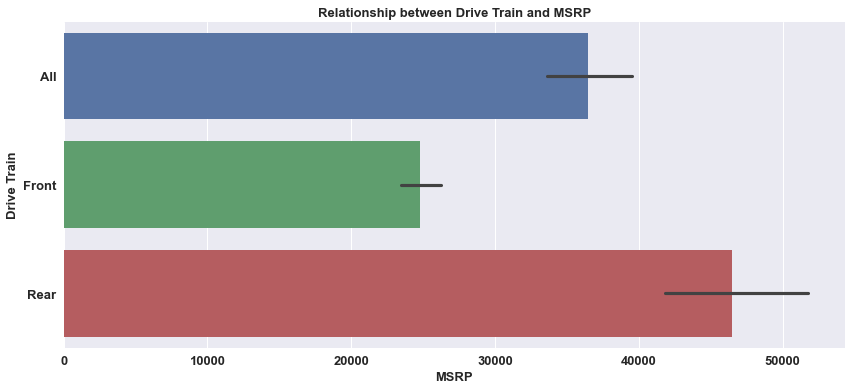

In [114]:
fig = plt.figure(figsize=(14, 6))
sns.barplot(y='drivetrain', x='msrp', data=data)
plt.title('Relationship between Drive Train and MSRP', fontsize=13, weight='bold')
plt.xticks(fontsize=13, weight='bold')
plt.yticks(fontsize=13, weight='bold')
plt.xlabel('MSRP',weight='bold', fontsize=13)
plt.ylabel('Drive Train',weight='bold', fontsize=13)
plt.show()

> **Rear Drive Train contributes more to MRSP**

### X/y split

In [115]:
data.head()

,make,model,type,origin,drivetrain,msrp,invoice,enginesize,cylinders,horsepower,mpg_city,mpg_highway,weight,wheelbase,length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [117]:
X = data.drop(['model', 'msrp'], axis=1)
y = data.msrp

In [118]:
X.head()

,make,type,origin,drivetrain,invoice,enginesize,cylinders,horsepower,mpg_city,mpg_highway,weight,wheelbase,length
0,Acura,SUV,Asia,All,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,Sedan,Asia,Front,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,Sedan,Asia,Front,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,Sedan,Asia,Front,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,Sedan,Asia,Front,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


##### Label encode all Categorical Values

In [123]:
X.select_dtypes(include='object').columns

Index(['make', 'type', 'origin', 'drivetrain'], dtype='object')

In [127]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for col in ['make', 'type', 'origin', 'drivetrain']:
    X[col] =  LE.fit_transform(X[col])
X.head()

,make,type,origin,drivetrain,invoice,enginesize,cylinders,horsepower,mpg_city,mpg_highway,weight,wheelbase,length
0,0,1,0,0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,0,2,0,1,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,0,2,0,1,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,0,2,0,1,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,0,2,0,1,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


## Predictive Modelling

> Building predictive model for predicting MSRP (Manufacture's Suggested Retail Price)

### Train/Test split

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Build regression models

- DecisionTreeRegressor
- BaggingRegressor
- RandomForestRegressor
- VotingRegressor

In [121]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import math

###### DecisionTreeRegressor, BaggingRegressor and RandomForestRegressor

In [129]:
dtree = DecisionTreeRegressor(max_depth=6, random_state=42)
#prev maxdepth 6, nestimators 300
models = [
    ("DT_Regressor", DecisionTreeRegressor(max_depth=3, random_state=42)),
    ("RF_Regressor", RandomForestRegressor(n_estimators=380, random_state=42)),
    ("Bagging_Regressor", BaggingRegressor(base_estimator=dtree, n_estimators=200, oob_score=True)),
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("---------- model: " + name + "-------------------")
    print('Train score: ', round(model.score(X_train, y_train), 2))
    print('Test score: ', round(model.score(X_test, y_test), 2))
    print('MSE: ', MSE(y_test, y_pred))
    print('R MSE: ', math.sqrt(MSE(y_test, y_pred)))
    print()

---------- model: DT_Regressor-------------------
Train score:  0.97
Test score:  0.95
MSE:  12401424.995695008
R MSE:  3521.5657023112612

---------- model: RF_Regressor-------------------
Train score:  0.99
Test score:  1.0
MSE:  1134650.6468775065
R MSE:  1065.1998154700866

---------- model: Bagging_Regressor-------------------
Train score:  0.99
Test score:  1.0
MSE:  1235061.876533878
R MSE:  1111.3333777646912



###### VotingRegressor

In [130]:
vc = VotingRegressor(estimators=models)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
print('Train score: ', round(vc.score(X_train, y_train), 2))
print('Test score: ', round(vc.score(X_test, y_test), 2))
print('MSE: ', MSE(y_test, y_pred))
print('R MSE: ', math.sqrt(MSE(y_test, y_pred)))
print()

Train score:  0.99
Test score:  0.99
MSE:  2615090.0137298116
R MSE:  1617.1239945439595

